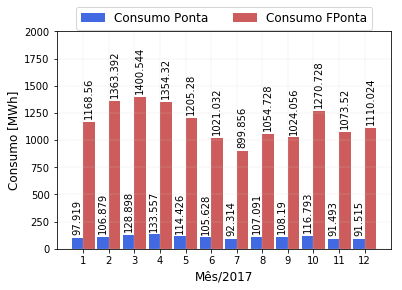

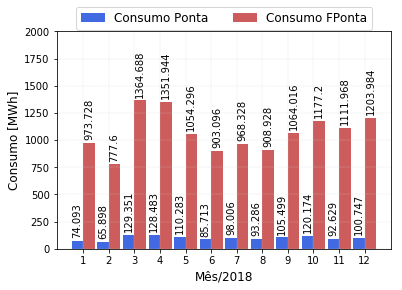

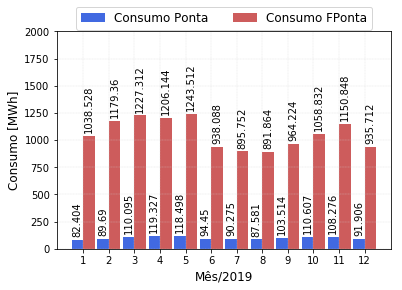

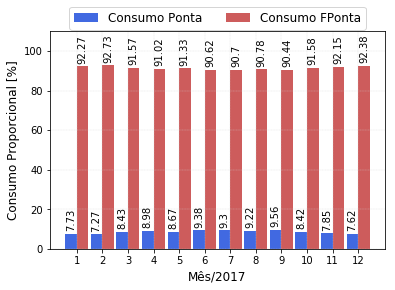

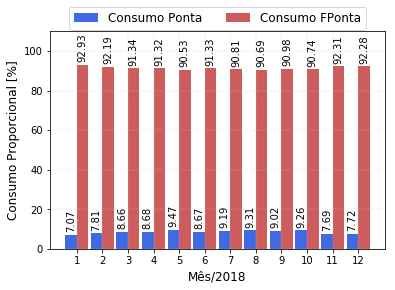

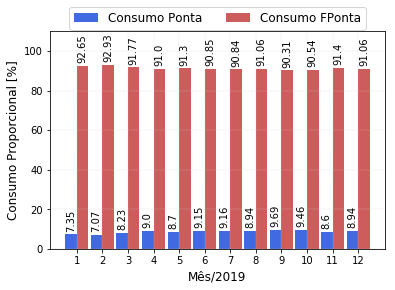

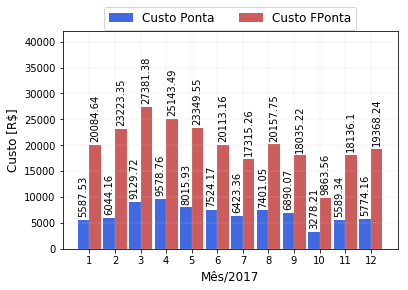

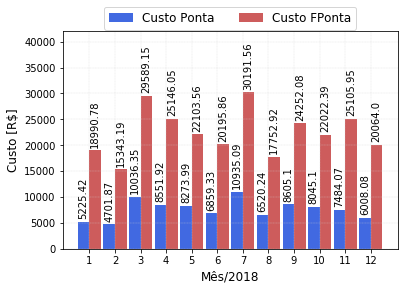

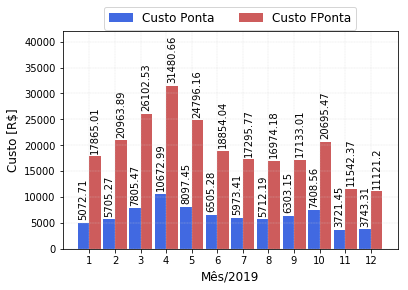

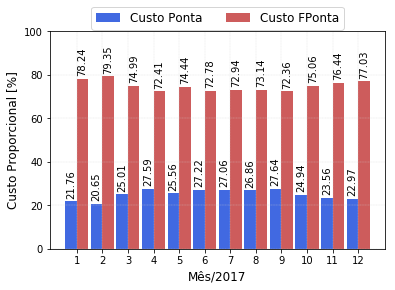

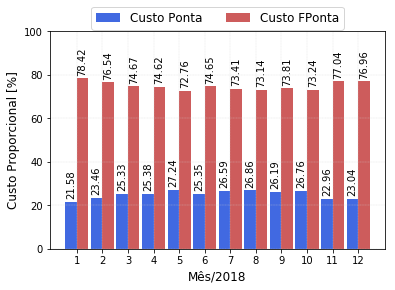

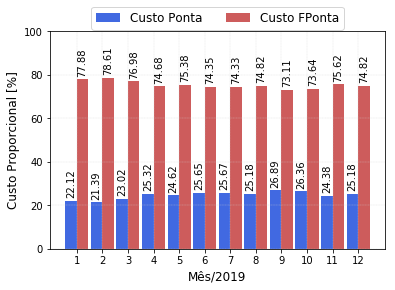

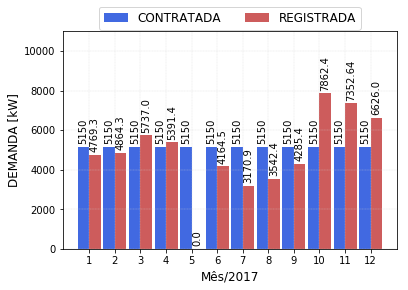

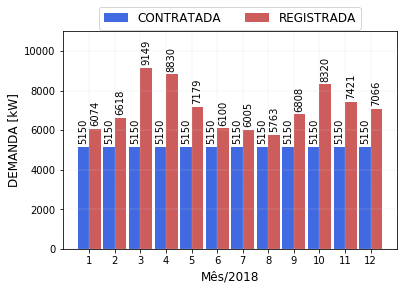

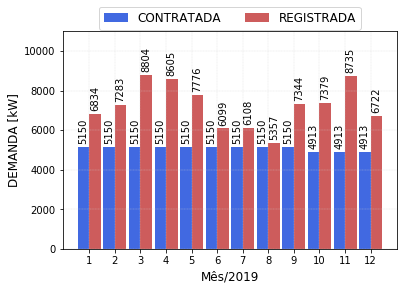

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.ticker as ticker
import matplotlib as mpl
import random
mpl.rcParams['agg.path.chunksize'] = 10000

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#--------------------------------------------- FUNÇÕES ---------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

#Função para colocar a legenda sobre cada uma das barras dos gráifocs
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), rotation=90,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#--------------------------------------- LEITURA DOS DADOS -----------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

df2017 = pd.read_excel(r'Contas de energia UFRJ 2017.xlsx')
#Contando o tolal de dados nulos no DataFrame
count_zero2017 = df2017.isna().sum()
count_nonzero2017 = df2017.count()
#Preenchendo espços vazios (NaN) com zeros
df2017 = df2017.fillna(0)

df2018 = pd.read_excel(r'Contas de energia UFRJ 2018.xlsx')
#Contando o tolal de dados nulos no DataFrame
count_zero2018 = df2018.isna().sum()
count_nonzero2018 = df2018.count()
#Preenchendo espços vazios (NaN) com zeros
df2018 = df2018.fillna(0)

df2019 = pd.read_excel(r'Contas de energia UFRJ 2019.xlsx')
#Contando o tolal de dados nulos no DataFrame
count_zero2019 = df2019.isna().sum()
count_nonzero2019 = df2019.count()
#Preenchendo espços vazios (NaN) com zeros
df2019 = df2019.fillna(0)


# #Identificando o nome de cada uma das colunas
# ColumnsLabel = df2018.columns.values
# print(ColumnsLabel)

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#-------------------------------------- TOTAL DE DADOS NULOS ---------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

#Escrevendo o arquivo .txt com os dados dos Nulos por categoria
file = open('DadosNulos.txt','w+')
aux0 = df2017.columns.values
aux1 = count_zero2017.values
aux2 = count_zero2018.values
aux3 = count_zero2019.values

for k in range(len(aux0)):
    file.write(f' {aux0[k]} {aux1[k]} {aux2[k]} {aux3[k]} \n')

file.close()

# print(count_nonzero2017)
# print(count_zero2017/count_nonzero2017)
# print('')
# print('2018')
# print(count_zero2018)
# print(count_nonzero2018)
# print(count_zero2018/count_nonzero2018)
# print('')
# print('2019')
# print(count_zero2019)
# print(count_nonzero2019)
# print(count_zero2019/count_nonzero2019)

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#--------------------------------------- CONSUMO TOTAL DE ENERGIA ----------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

df2017['ENERGIA_P\n[kWh]'] = df2017['ENERGIA_PONTA\n[kWh]'].apply(lambda x: x/1000)
df2017['ENERGIA_FP\n[kWh]'] = df2017['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)
df2018['ENERGIA_P\n[kWh]'] = df2018['ENERGIA_PONTA\n[kWh]'].apply(lambda x: x/1000)
df2018['ENERGIA_FP\n[kWh]'] = df2018['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)
df2019['ENERGIA_P\n[kWh]'] = df2019['ENERGIA_PONTA\n[kWh]'].apply(lambda x: x/1000)
df2019['ENERGIA_FP\n[kWh]'] = df2019['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)

#Consumos 2017
labels = df2017['MÊS']
men_means = df2017['ENERGIA_P\n[kWh]']
women_means = df2017['ENERGIA_FP\n[kWh]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2017', fontsize=12)
ax.set_ylabel('Consumo [MWh]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,2000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Consumo2017.svg', dpi=800)
plt.show()

#Consumos 2018
labels = df2018['MÊS']
men_means = df2018['ENERGIA_P\n[kWh]']
women_means = df2018['ENERGIA_FP\n[kWh]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2018', fontsize=12)
ax.set_ylabel('Consumo [MWh]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,2000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Consumo2018.svg', dpi=800)
plt.show()

#Consumos 2019
labels = df2019['MÊS']
men_means = df2019['ENERGIA_P\n[kWh]']
women_means = df2019['ENERGIA_FP\n[kWh]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2019', fontsize=12)
ax.set_ylabel('Consumo [MWh]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,2000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Consumo2019.svg', dpi=800)
plt.show()

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#-------------------------------------- CONSUMO PERCENTUAL DE ENERGIA ------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

# df2017['ENERGIA_PONTA\n[kWh]'] = df2017['ENERGIA_PONTA\n[kWh]']
# df2017['ENERGIA_FPONTA\n[kWh]'] = df2017['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)
# df2018['ENERGIA_PONTA\n[kWh]'] = df2018['ENERGIA_PONTA\n[kWh]'].apply(lambda x: x/1000)
# df2018['ENERGIA_FPONTA\n[kWh]'] = df2018['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)
# df2019['ENERGIA_PONTA\n[kWh]'] = df2019['ENERGIA_PONTA\n[kWh]'].apply(lambda x: x/1000)
# df2019['ENERGIA_FPONTA\n[kWh]'] = df2019['ENERGIA_FPONTA\n[kWh]'].apply(lambda x: x/1000)

#Custos 2017
labels = df2017['MÊS']
men_means = np.round((100*df2017['ENERGIA_PONTA\n[kWh]']/(df2017['ENERGIA_FPONTA\n[kWh]']+df2017['ENERGIA_PONTA\n[kWh]'])),2)
women_means = np.round((100*df2017['ENERGIA_FPONTA\n[kWh]']/(df2017['ENERGIA_FPONTA\n[kWh]']+df2017['ENERGIA_PONTA\n[kWh]'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2017', fontsize=12)
ax.set_ylabel('Consumo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,110])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('ProporçãoConsumo2017.svg', dpi=800)
plt.show()

#Custos 2018
labels = df2018['MÊS']
men_means = np.round((100*df2018['ENERGIA_PONTA\n[kWh]']/(df2018['ENERGIA_FPONTA\n[kWh]']+df2018['ENERGIA_PONTA\n[kWh]'])),2)
women_means = np.round((100*df2018['ENERGIA_FPONTA\n[kWh]']/(df2018['ENERGIA_FPONTA\n[kWh]']+df2018['ENERGIA_PONTA\n[kWh]'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2018', fontsize=12)
ax.set_ylabel('Consumo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,110])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('ProporçãoConsumo2018.svg', dpi=800)
plt.show()

#Custos 2019
labels = df2019['MÊS']
men_means = np.round((100*df2019['ENERGIA_PONTA\n[kWh]']/(df2019['ENERGIA_FPONTA\n[kWh]']+df2019['ENERGIA_PONTA\n[kWh]'])),2)
women_means = np.round((100*df2019['ENERGIA_FPONTA\n[kWh]']/(df2019['ENERGIA_FPONTA\n[kWh]']+df2019['ENERGIA_PONTA\n[kWh]'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Consumo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Consumo FPonta', color='indianred')
ax.set_xlabel('Mês/2019', fontsize=12)
ax.set_ylabel('Consumo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,110])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('ProporçãoConsumo2019.svg', dpi=800)
plt.show()

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#------------------------------ CUSTOS DE ENERGIA - PONTA E FORA PONTA   ---------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
    
df2017['A'] = df2017['PIS/PASEP'] + df2017['COFINS'] + df2017['ICMS']
df2017['P'] = df2017['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2017['TAR_TE_KWH_P\n[R$/kWh]']
df2017['FP'] = df2017['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2017['TAR_TE_KWH_FP\n[R$/kWh]']
df2017['C'] = df2017['A']*df2017['P']*df2017['ENERGIA_PONTA\n[kWh]']
df2017['C'] = df2017['C'].apply(lambda x: np.round(x,2))
df2017['D'] = df2017['A']*df2017['FP']*df2017['ENERGIA_FPONTA\n[kWh]']
df2017['D'] = df2017['D'].apply(lambda x: np.round(x,2))

df2018['A'] = df2018['PIS/PASEP'] + df2018['COFINS'] + df2018['ICMS']
df2018['P'] = df2018['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2018['TAR_TE_KWH_P\n[R$/kWh]']
df2018['FP'] = df2018['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2018['TAR_TE_KWH_FP\n[R$/kWh]']
df2018['C'] = df2018['A']*df2018['P']*df2018['ENERGIA_PONTA\n[kWh]']
df2018['C'] = df2018['C'].apply(lambda x: np.round(x,2))
df2018['D'] = df2018['A']*df2018['FP']*df2018['ENERGIA_FPONTA\n[kWh]']
df2018['D'] = df2018['D'].apply(lambda x: np.round(x,2))

df2019['A'] = df2019['PIS/PASEP'] + df2019['COFINS'] + df2019['ICMS']
df2019['P'] = df2019['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2019['TAR_TE_KWH_P\n[R$/kWh]']
df2019['FP'] = df2019['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2019['TAR_TE_KWH_FP\n[R$/kWh]']
df2019['C'] = df2019['A']*df2019['P']*df2019['ENERGIA_PONTA\n[kWh]']
df2019['C'] = df2019['C'].apply(lambda x: np.round(x,2))
df2019['D'] = df2019['A']*df2019['FP']*df2019['ENERGIA_FPONTA\n[kWh]']
df2019['D'] = df2019['D'].apply(lambda x: np.round(x,2))

#Custos 2017
labels = df2017['MÊS']
men_means = df2017['C']
women_means = df2017['D']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2017', fontsize=12)
ax.set_ylabel('Custo [R$]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,42000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Custos2017.svg', dpi=800)
plt.show()

#Custos 2018
labels = df2018['MÊS']
men_means = df2018['C']
women_means = df2018['D']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2018', fontsize=12)
ax.set_ylabel('Custo [R$]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,42000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Custos2018.svg', dpi=800)
plt.show()

#Custos 2019
labels = df2019['MÊS']
men_means = df2019['C']
women_means = df2019['D']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2019', fontsize=12)
ax.set_ylabel('Custo [R$]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,42000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Custos2019.svg', dpi=800)
plt.show()

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#------------------------------------ PROPORÇÃO DE CUSTOS DE ENRGIA --------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
    
df2017['A'] = df2017['PIS/PASEP'] + df2017['COFINS'] + df2017['ICMS']
df2017['P'] = df2017['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2017['TAR_TE_KWH_P\n[R$/kWh]']
df2017['FP'] = df2017['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2017['TAR_TE_KWH_FP\n[R$/kWh]']
df2017['C'] = df2017['A']*df2017['P']*df2017['ENERGIA_PONTA\n[kWh]']
df2017['C'] = df2017['C'].apply(lambda x: np.round(x,2))
df2017['D'] = df2017['A']*df2017['FP']*df2017['ENERGIA_FPONTA\n[kWh]']
df2017['D'] = df2017['D'].apply(lambda x: np.round(x,2))

df2018['A'] = df2018['PIS/PASEP'] + df2018['COFINS'] + df2018['ICMS']
df2018['P'] = df2018['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2018['TAR_TE_KWH_P\n[R$/kWh]']
df2018['FP'] = df2018['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2018['TAR_TE_KWH_FP\n[R$/kWh]']
df2018['C'] = df2018['A']*df2018['P']*df2018['ENERGIA_PONTA\n[kWh]']
df2018['C'] = df2018['C'].apply(lambda x: np.round(x,2))
df2018['D'] = df2018['A']*df2018['FP']*df2018['ENERGIA_FPONTA\n[kWh]']
df2018['D'] = df2018['D'].apply(lambda x: np.round(x,2))

df2019['A'] = df2019['PIS/PASEP'] + df2019['COFINS'] + df2019['ICMS']
df2019['P'] = df2019['TAR_TUSD_KWH_P\n[R$/kWh]'] + df2019['TAR_TE_KWH_P\n[R$/kWh]']
df2019['FP'] = df2019['TAR_TUSD_KWH_FP\n[R$/kWh]'] + df2019['TAR_TE_KWH_FP\n[R$/kWh]']
df2019['C'] = df2019['A']*df2019['P']*df2019['ENERGIA_PONTA\n[kWh]']
df2019['C'] = df2019['C'].apply(lambda x: np.round(x,2))
df2019['D'] = df2019['A']*df2019['FP']*df2019['ENERGIA_FPONTA\n[kWh]']
df2019['D'] = df2019['D'].apply(lambda x: np.round(x,2))

#Custos 2017
labels = df2017['MÊS']
men_means = np.round((100*df2017['C']/(df2017['C']+df2017['D'])),2)
women_means = np.round((100*df2017['D']/(df2017['C']+df2017['D'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2017', fontsize=12)
ax.set_ylabel('Custo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,100])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Proporção2017.svg', dpi=800)
plt.show()

#Custos 2018
labels = df2018['MÊS']
men_means = np.round((100*df2018['C']/(df2018['C']+df2018['D'])),2)
women_means = np.round((100*df2018['D']/(df2018['C']+df2018['D'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2018', fontsize=12)
ax.set_ylabel('Custo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,100])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Proporção2018.svg', dpi=800)
plt.show()

#Custos 2019
labels = df2019['MÊS']
men_means = np.round((100*df2019['C']/(df2019['C']+df2019['D'])),2)
women_means = np.round((100*df2019['D']/(df2019['C']+df2019['D'])),2)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Custo Ponta', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='Custo FPonta', color='indianred')
ax.set_xlabel('Mês/2019', fontsize=12)
ax.set_ylabel('Custo Proporcional [%]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,100])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Proporção2019.svg', dpi=800)
plt.show()

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#--------------------------------- DEMANDA CONTRATADA VS REGISTRADA --------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

df2017['DEMANDA_CONTRATADA\n[kW]'] = df2017['DEMANDA_CONTRATADA_P\n[kW]']+df2017['DEMANDA_CONTRATADA_FP\n[kW]']
df2017['DEMANDA_CONTRATADA\n[kW]'] = df2017['DEMANDA_CONTRATADA\n[kW]'].apply(lambda x: np.round(x,2))
df2017['DEMANDA_REGISTRADA\n[kW]'] = df2017['DEMANDA_REGISTRADA_P\n[kW]']+df2017['DEMANDA_REGISTRADA_FP\n[kW]']
df2017['DEMANDA_REGISTRADA\n[kW]'] = df2017['DEMANDA_REGISTRADA\n[kW]'].apply(lambda x: np.round(x,2))

df2018['DEMANDA_CONTRATADA\n[kW]'] = df2018['DEMANDA_CONTRATADA_P\n[kW]']+df2018['DEMANDA_CONTRATADA_FP\n[kW]']
df2018['DEMANDA_CONTRATADA\n[kW]'] = df2018['DEMANDA_CONTRATADA\n[kW]'].apply(lambda x: np.round(x,2))
df2018['DEMANDA_REGISTRADA\n[kW]'] = df2018['DEMANDA_REGISTRADA_P\n[kW]']+df2018['DEMANDA_REGISTRADA_FP\n[kW]']
df2018['DEMANDA_REGISTRADA\n[kW]'] = df2018['DEMANDA_REGISTRADA\n[kW]'].apply(lambda x: np.round(x,2))

df2019['DEMANDA_CONTRATADA\n[kW]'] = df2019['DEMANDA_CONTRATADA_P\n[kW]']+df2019['DEMANDA_CONTRATADA_FP\n[kW]']
df2019['DEMANDA_CONTRATADA\n[kW]'] = df2019['DEMANDA_CONTRATADA\n[kW]'].apply(lambda x: np.round(x,2))
df2019['DEMANDA_REGISTRADA\n[kW]'] = df2019['DEMANDA_REGISTRADA_P\n[kW]']+df2019['DEMANDA_REGISTRADA_FP\n[kW]']
df2019['DEMANDA_REGISTRADA\n[kW]'] = df2019['DEMANDA_REGISTRADA\n[kW]'].apply(lambda x: np.round(x,2))

#Demandas 2017
labels = df2017['MÊS']
men_means = df2017['DEMANDA_CONTRATADA\n[kW]']
women_means = df2017['DEMANDA_REGISTRADA\n[kW]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='CONTRATADA', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='REGISTRADA', color='indianred')
ax.set_xlabel('Mês/2017', fontsize=12)
ax.set_ylabel('DEMANDA [kW]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,11000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Demanda2017.png', dpi=1000)
plt.show()

#Demandas 2018
labels = df2018['MÊS']
men_means = df2018['DEMANDA_CONTRATADA\n[kW]']
women_means = df2018['DEMANDA_REGISTRADA\n[kW]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='CONTRATADA', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='REGISTRADA', color='indianred')
ax.set_xlabel('Mês/2018', fontsize=12)
ax.set_ylabel('DEMANDA [kW]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,11000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Demanda2018.png', dpi=1000)
plt.show()

#Demandas 2019
labels = df2019['MÊS']
men_means = df2019['DEMANDA_CONTRATADA\n[kW]']
women_means = df2019['DEMANDA_REGISTRADA\n[kW]']
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='CONTRATADA', color='royalblue')
rects2 = ax.bar(x + width/2, women_means, width, label='REGISTRADA', color='indianred')
ax.set_xlabel('Mês/2019', fontsize=12)
ax.set_ylabel('DEMANDA [kW]', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.0,11000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)
autolabel(rects1)
autolabel(rects2)
plt.savefig('Demanda2019.png', dpi=1000)
plt.show()

#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------- DEMANDA ULTRAPASSADA -------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

# df2017['DEMANDA_CONTRATADA\n[kW]'] = df2017['DEMANDA_CONTRATADA_P\n[kW]']+df2017['DEMANDA_CONTRATADA_FP\n[kW]']
# df2017['DEMANDA_REGISTRADA\n[kW]'] = df2017['DEMANDA_REGISTRADA_P\n[kW]']+df2017['DEMANDA_REGISTRADA_FP\n[kW]']
# df2017['DEMANDA_ULTRAPASSADA\n[kW]'] = df2017['DEMANDA_REGISTRADA\n[kW]']-df2017['DEMANDA_CONTRATADA\n[kW]']
# df2017.loc[df2017['DEMANDA_ULTRAPASSADA\n[kW]'] <= 0, 'DEMANDA_ULTRAPASSADA\n[kW]'] = 0
# df2017['DEMANDA_ULTRAPASSADA\n[kW]'] = df2017['DEMANDA_ULTRAPASSADA\n[kW]']*df2017['TAR_TUSD_KW_FP\n[R$/kW]']*2
# df2017['DEMANDA_ULTRAPASSADA\n[kW]'] = df2017['DEMANDA_ULTRAPASSADA\n[kW]'].apply(lambda x: np.round(x,2))

# #Demandas 2017
# labels = df2017['MÊS']
# men_means = df2017['DEMANDA_ULTRAPASSADA\n[kW]']
# x = np.arange(len(labels))  # the label locations
# width = 0.45  # the width of the bars
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='CONTRATADA', color='royalblue')
# ax.set_xlabel('Mês/2017', fontsize=12)
# ax.set_ylabel('Custo Ultrapassagem [R$]', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim([0.0,110000])
# # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
# ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), rotation=90,
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

# plt.savefig('Ultrapassagem2017.png', dpi=1000)
# plt.show()



#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------   Reativos ------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#
#---------------------------------------------------------------------------------------------------------#

# df2017['ENERGIA REAT EXC PONTA [R$]'] = df2017['REAT_KVAR_PONTA\n[kVAr]']*df2017['TAR_REAT_PONTA\n[R$/kVAr]']
# df2017['TOTAL_REAT_FPONTA\n[R$]'] = df2017['REAT_KVAR_FPONTA\n[kVAr]']*df2017['TAR_REAT_FPONTA\n[R$/kVAr]']
# df2017['TOTAL_REAT\n[R$]'] = df2017['TOTAL_REAT_PONTA\n[R$]'] + df2017['TOTAL_REAT_FPONTA\n[R$]']
# df2017['PERCENTUAL_REAT\n[%]'] = 100*df2017['TOTAL_REAT\n[R$]']/df2017['Valor da Fatura\n[R$]']
# df2017['TOTAL_REAT\n[R$]'] = df2017['TOTAL_REAT\n[R$]'].apply(lambda x: x/1000)
# df2017['Valor da Fatura\n[R$]'] = df2017['Valor da Fatura\n[R$]'].apply(lambda x: x/1000)

# df2018['TOTAL_REAT_PONTA\n[R$]'] = df2018['REAT_KVAR_PONTA\n[kVAr]']*df2018['TAR_REAT_PONTA\n[R$/kVAr]']
# df2018['TOTAL_REAT_FPONTA\n[R$]'] = df2018['REAT_KVAR_FPONTA\n[kVAr]']*df2018['TAR_REAT_FPONTA\n[R$/kVAr]']
# df2018['TOTAL_REAT\n[R$]'] = df2018['TOTAL_REAT_PONTA\n[R$]'] + df2018['TOTAL_REAT_FPONTA\n[R$]']
# df2018['PERCENTUAL_REAT\n[%]'] = 100*df2018['TOTAL_REAT\n[R$]']/df2018['Valor da Fatura\n[R$]']
# df2018['TOTAL_REAT\n[R$]'] = df2018['TOTAL_REAT\n[R$]'].apply(lambda x: x/1000)
# df2018['Valor da Fatura\n[R$]'] = df2018['Valor da Fatura\n[R$]'].apply(lambda x: x/1000)

# df2019['TOTAL_REAT_PONTA\n[R$]'] = df2019['REAT_KVAR_PONTA\n[kVAr]']*df2019['TAR_REAT_PONTA\n[R$/kVAr]']
# df2019['TOTAL_REAT_FPONTA\n[R$]'] = df2019['REAT_KVAR_FPONTA\n[kVAr]']*df2019['TAR_REAT_FPONTA\n[R$/kVAr]']
# df2019['TOTAL_REAT\n[R$]'] = df2019['TOTAL_REAT_PONTA\n[R$]'] + df2019['TOTAL_REAT_FPONTA\n[R$]']
# df2019['PERCENTUAL_REAT\n[%]'] = 100*df2019['TOTAL_REAT\n[R$]']/df2019['Valor da Fatura\n[R$]']
# df2019['TOTAL_REAT\n[R$]'] = df2019['TOTAL_REAT\n[R$]'].apply(lambda x: x/1000)
# df2019['Valor da Fatura\n[R$]'] = df2019['Valor da Fatura\n[R$]'].apply(lambda x: x/1000)



# #Custos 2017
# labels = df2017['MÊS']
# men_means = df2017['ENERGIA REAT EXC PONTA [R$]']
# women_means = df2017['ENERGIA REAT EXC FP [R$]']
# width = 0.45  # the width of the bars
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Ponta', color='royalblue')
# rects2 = ax.bar(x + width/2, women_means, width, label='FPonta', color='indianred')
# ax.set_xlabel('Mês/2017', fontsize=12)
# ax.set_ylabel('Excedente Potência Reativa [R$]', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim([0.0,35000])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
# ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), rotation=90,
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# plt.savefig('ExcedenteReativos2017.svg', dpi=800)
# plt.show()

# #Custos 2018
# labels = df2018['MÊS']
# men_means = df2018['ENERGIA REAT EXC PONTA [R$]']
# women_means = df2018['ENERGIA REAT EXC FP [R$]']
# width = 0.45  # the width of the bars
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Ponta', color='royalblue')
# rects2 = ax.bar(x + width/2, women_means, width, label='FPonta', color='indianred')
# ax.set_xlabel('Mês/2018', fontsize=12)
# ax.set_ylabel('Excedente Potência Reativa [R$]', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim([0.0,35000])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
# ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), rotation=90,
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# plt.savefig('ExcedenteReativos2018.svg', dpi=800)
# plt.show()

# #Custos 2019
# labels = df2019['MÊS']
# men_means = df2019['ENERGIA REAT EXC PONTA [R$]']
# women_means = df2019['ENERGIA REAT EXC FP [R$]']
# width = 0.45  # the width of the bars
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Ponta', color='royalblue')
# rects2 = ax.bar(x + width/2, women_means, width, label='FPonta', color='indianred')
# ax.set_xlabel('Mês/2019', fontsize=12)
# ax.set_ylabel('Excedente Potência Reativa [R$]', fontsize=12)
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.set_ylim([0.0,35000])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), fontsize=12, ncol=3)
# ax.grid(linestyle='--', color='lightgrey', linewidth=0.3)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height), rotation=90,
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# plt.savefig('ExcedenteReativos2019.svg', dpi=800)
# plt.show()

In [7]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import math
import datetime
import matplotlib.ticker as ticker
import matplotlib as mpl
import random
mpl.rcParams['agg.path.chunksize'] = 10000


rec_op = ['LISTADO_400103365_2017.xlsx',
         'LISTADO_400103365_2018.xlsx',
         'LISTADO_400103365_2019.xlsx']

days = [0, 1, 2, 3, 4, 5, 6]
month = [1, 2, 3, 4, 5, 6, 7 ,8 ,9 ,10, 11, 12]

mean2017 = []
mean2018 = []
mean2019 = []

for file in rec_op:
    for mes in month:
        print(file)
        df = pd.read_excel(file,index_col=False,skiprows=1)


        df['ts'] = df['Data']
        df['ts'] = pd.to_datetime(df['ts'],dayfirst=True)
        df = df.set_index('ts')

#         df = df[df.index.dayofweek == day]
        df = df[df.index.month == mes]
        
        if file == 'LISTADO_400103365_2017.xlsx':
            mean2017.append(df['FP'].mean())
        elif file == 'LISTADO_400103365_2018.xlsx':
            mean2018.append(df['FP'].mean()) 
        elif file == 'LISTADO_400103365_2019.xlsx':
            mean2019.append(df['FP'].mean()) 
        
        #Convert index to a list of dates without days like (2017-03  00:00:00 )
        group_date = [dt.datetime.strftime(e, '%Y %H:%M:%S') for e in df.index]
        #group the data by the new group_date
        df_1s = df.groupby(group_date)['FP'].mean().to_frame()

print(mean2017, mean2018, mean2019)        
        
#         df.reset_index(drop=True, inplace=True)
        
#         #Utilizar o mesmo eixo
#         ax = plt.gca()

#         rgb = (random.random(), random.random(), random.random())
#         if day == 0:
#             dia = 'Domingo'
#         elif day == 1:
#             dia = 'Segunda'
#         elif day == 2:
#             dia = 'Terça'
#         elif day == 3:
#             dia = 'Quarta'
#         elif day == 4:
#             dia = 'Quinta'
#         elif day == 5:
#             dia = 'Sexta'
#         elif day == 6:
#             dia = 'Sábado'
        
#         if month == 1:
#             mes = 'Janeiro'
#         elif month == 2:
#             mes = 'Fevereiro'
#         elif month == 3:
#             mes = 'Março'
#         elif month == 4:
#             mes = 'Abril'
#         elif month == 5:
#             mes = 'Maio'
#         elif month == 6:
#             mes = 'Junho'
#         elif month == 7:
#             mes = 'Julho'
#         elif month == 8:
#             mes = 'Agosto'
#         elif month == 9:
#             mes = 'Setembro'
#         elif month == 10:
#             mes = 'Outubro'
#         elif month == 11:
#             mes = 'Novembro'
#         elif month == 12:
#             mes = 'Dezembro'

            
#         df_1s.to_csv(file+str(mes)+'.csv')
#         #Criando uma cópia do DF para evitar mexer nos dados
#         df['HORA'] = (df['Data'].dt.time)
#         aux_hora = df.loc[:,'HORA']

#         #Removendo os milisegundos da string de horas
#         aux_hora = aux_hora.map(lambda x: str(x)[:-3])
#         aux_hora = aux_hora.drop_duplicates()

#         #Calculando a posição adequada de cada label
#         Ticks = int(len(aux_hora)/7)

#         #Selecionando os valores de horas a serem mostrados nos eixos - MANUALMENTE
#         aux = [aux_hora.iloc[0], aux_hora.iloc[Ticks], aux_hora.iloc[2*Ticks], \
#                aux_hora.iloc[3*Ticks], aux_hora.iloc[4*Ticks], aux_hora.iloc[5*Ticks], \
#                aux_hora.iloc[6*Ticks], aux_hora.iloc[7*Ticks]]
        
#         #Plotando os dados de tensão vs hora
#         df.plot(y='FP', label=dia, legend=True, linewidth=1, grid=True, color=[rgb], ax=ax)
# #         ax.set_xticklabels(df.index)  # now we change the labels of the xaxis
#         ax.yaxis.set_label_text('Fator de Potência', fontsize=12)
#         ax.legend(loc='upper center', bbox_to_anchor=(1.13, 0.8), ncol=1)

#         ax.tick_params(axis='both', labelsize=12, grid_linestyle='--', grid_color='lightgrey')
#         #Alocando os labels do eixo x manualmente
#         begin, end = ax.get_xlim()
#         stepsize = int((end-begin)/7)

#         ax.xaxis.set_ticks(np.arange(begin, end, stepsize))
#         ax.set_xticklabels(aux, rotation='15', fontsize=12)

#     plt.savefig(file+'.svg', dpi=800)
#     plt.show()

LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2017.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2018.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_2019.xlsx
LISTADO_400103365_20